In [3]:
import numpy as np
import matplotlib.pyplot as plt

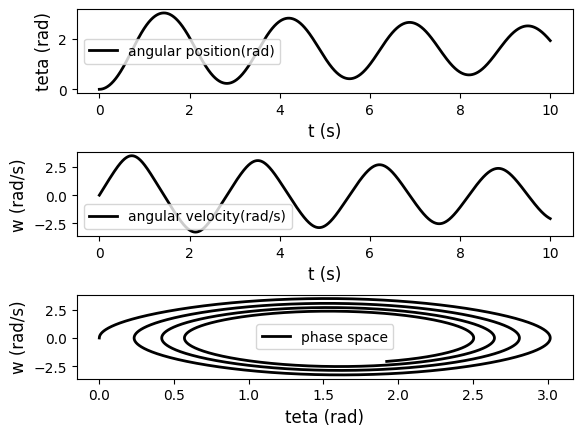

For k =  0.1
Maximum angular position : 172.905976818233 graus
Time at which theta_max occurs : 1.431 s
Maximum angular velocity : 3.5000226970204658 rad/s
Time at which w_max occurs : 0.72 s
Time for the particle to pass through the equilibrium position : 0.735 s


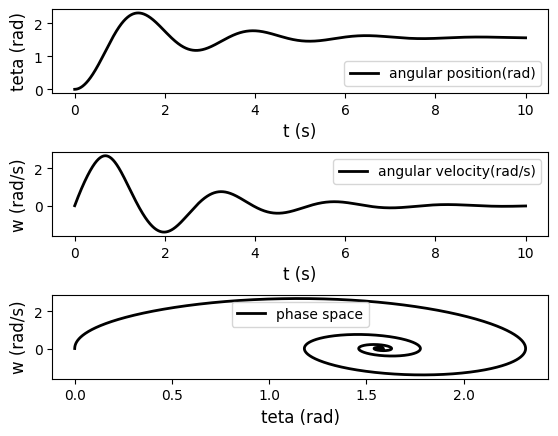

For k =  1.0
Maximum angular position : 132.85105568038134 graus
Time at which theta_max occurs : 1.408 s
Maximum angular velocity : 2.6737623015642376 rad/s
Time at which w_max occurs : 0.68 s
Time for the particle to pass through the equilibrium position : 2.14 s


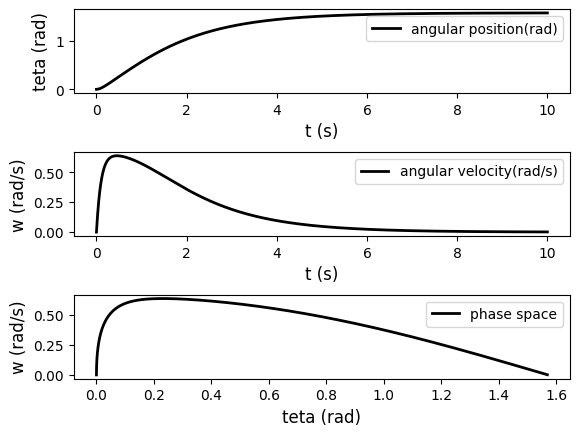

For k =  10.0
Maximum angular position : 89.88472563059008 graus
Time at which theta_max occurs : 9.999 s
Maximum angular velocity : 0.6366941056595325 rad/s
Time at which w_max occurs : 0.453 s


In [11]:
n = 10000  # number of time slots
dt = 0.001 # delta t (s)
r = 1.5    # radius (m)
g = 9.81   # acceleration of gravity

# creating null vectors:

t = np.zeros(n)    # time
teta = np.zeros(n) # angular position
w = np.zeros(n)    # angular velocity
alfa = np.zeros(n) # angular acceleration

# initial conditions :

t[0] = 0
teta[0] = 0
w[0] = 0
alfa[0] = g/r

k = []

while len(k) < 3 :
  y = float(input('Enter a value of k:'))
  if y in k:
    print('Do not enter repeated numbers')
  else:
    k.append(y) #k = [1, 2.5, 5]  : constant representing the effect of viscosity (s^-1)

# temporal evolution:

for a in range(len(k)) :

  for i in range (1, n) :
    t[i] = i*dt
    if i == 1 :
     w[i] = w[i-1] + 0.5*dt*alfa[i-1] # using the midpoint rule
    else :
      w[i] = w[i-1] + dt*alfa[i-1]
    teta[i] = teta[i - 1] + w[i]*dt
    alfa[i] = g*np.cos(teta[i])/r - k[a]*w[i] # ordinary differential equation

# construction of graphics:

  plt.figure()
  plt.subplot(311)
  #plt.axis([0, 5, 0, 2.5])
  plt.plot(t, teta,'k', lw = 2., label='angular position(rad)')
  plt.xlabel('t (s)', fontsize=12)
  plt.ylabel('teta (rad)',fontsize=12)
  plt.legend()

  plt.subplot(312)
  #plt.axis([0, 5, -1.5, 3.5])
  plt.plot(t, w,'k', lw = 2., label='angular velocity(rad/s)')
  plt.xlabel('t (s)',fontsize=12)
  plt.ylabel('w (rad/s)',fontsize=12)
  plt.legend()

  plt.subplot(313)
  #plt.axis([0, 5, -1.5, 3.5])
  plt.plot(teta, w,'k', lw = 2., label='phase space')
  plt.xlabel('teta (rad)',fontsize=12)
  plt.ylabel('w (rad/s)',fontsize=12)
  plt.legend()

  plt.subplots_adjust(hspace = 0.7)

  plt.show()

# Results obtained:

  print('For k = ', k[a] )
  print('Maximum angular position :', 180*max(teta)/(np.pi), 'graus')

  t1 = np.zeros(n) # t1 = time at which theta_max occurs
  t1[0] = 0

  for j in range (1, n):
    t1[j] = t1[j] + j*dt
    if teta[j] == max(teta):
      print('Time at which theta_max occurs :', t1[j], 's')
      break;

  print('Maximum angular velocity :', max(w), 'rad/s')

  t2 = np.zeros(n) # t2 = time at which w_max occurs
  t2[0] = 0

  for x in range (1, n):
    t2[x] = t2[x] + x*dt
    if w[x] == max(w):
      print('Time at which w_max occurs :', t2[x], 's')
      break;

  t3 = np.zeros(n) # t3 = time in which it occurs teta = 90 graus
  t3[0] = 0

  for c in range (1, n):
    t3[c] = t3[c] + c*dt
    if  (np.pi)/2 - 0.001 < teta[c] < (np.pi)/2 + 0.001 :
      print('Time for the particle to pass through the equilibrium position :', t3[c], 's')
      break;

## Comparison of k values

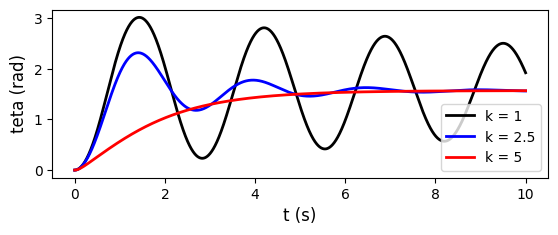

In [12]:
plt.figure()
#plt.grid()
#plt.axis([0, 5, 0, 2.5])
plt.subplot(211)
plt.xlabel('t (s)', fontsize=12)
plt.ylabel('teta (rad)',fontsize=12)

for i in range (1, n) :
  t[i] = i*dt
  if i == 1 :
    w[i] = w[i-1] + 0.5*dt*alfa[i-1]
  else :
    w[i] = w[i-1] + dt*alfa[i-1]
  teta[i] = teta[i - 1] + w[i]*dt
  alfa[i] = g*np.cos(teta[i])/r - k[0]*w[i]

plt.plot(t, teta,'k', lw = 2., label='k = 1')

for i in range (1, n) :
  t[i] = i*dt
  if i == 1 :
    w[i] = w[i-1] + 0.5*dt*alfa[i-1]
  else :
    w[i] = w[i-1] + dt*alfa[i-1]
  teta[i] = teta[i - 1] + w[i]*dt
  alfa[i] = g*np.cos(teta[i])/r - k[1]*w[i]

plt.plot(t, teta,'b', lw = 2., label='k = 2.5')

for i in range (1, n) :
  t[i] = i*dt
  if i == 1 :
    w[i] = w[i-1] + 0.5*dt*alfa[i-1]
  else :
    w[i] = w[i-1] + dt*alfa[i-1]
  teta[i] = teta[i - 1] + w[i]*dt
  alfa[i] = g*np.cos(teta[i])/r - k[2]*w[i]

plt.plot(t, teta,'r', lw = 2., label='k = 5')

plt.legend()
plt.show()
